In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Definir palabras vacías adicionales a eliminar
extra_stopwords = [...]  # Agrega aquí las palabras adicionales a eliminar

# Función para preprocesar el texto
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminación de signos de puntuación
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Conversión a minúsculas
    tokens = [token.lower() for token in tokens]
    
    # Eliminación de palabras vacías
    stop_words = set(stopwords.words('english') + extra_stopwords)
    tokens = [token for token in tokens if token not in stop_words]
    
    # Unir tokens preprocesados en una cadena de texto
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Archivo de entrenamiento
df_train = pd.read_csv('dataframe_train.csv')

# Aplicar preprocesamiento a las columnas relevantes del conjunto de entrenamiento
df_train['title_cleaned_preprocessed'] = df_train['title_cleaned_nostopwords'].apply(preprocess_text)
df_train['description_preprocessed'] = df_train['description_nostopwords'].apply(preprocess_text)
df_train['full_content_preprocessed'] = df_train['full_content_nostopwords'].apply(preprocess_text)

# Archivo de prueba
df_test = pd.read_csv('dataframe_test.csv')

# Aplicar preprocesamiento a las columnas relevantes del conjunto de prueba
df_test['title_cleaned_preprocessed'] = df_test['title_cleaned_nostopwords'].apply(preprocess_text)
df_test['description_preprocessed'] = df_test['description_nostopwords'].apply(preprocess_text)
df_test['full_content_preprocessed'] = df_test['full_content_nostopwords'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fundacion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fundacion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# NO
df_clean_train = pd.read_csv('./dataframe_train.csv')

# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Definir palabras vacías adicionales a eliminar
extra_stopwords = [...]  # Agrega aquí las palabras adicionales a eliminar

# Función para preprocesar el texto
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminación de signos de puntuación
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Conversión a minúsculas
    tokens = [token.lower() for token in tokens]
    
    # Eliminación de palabras vacías
    stop_words = set(stopwords.words('english') + extra_stopwords)
    tokens = [token for token in tokens if token not in stop_words]
    
    # Unir tokens preprocesados en una cadena de texto
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Aplicar preprocesamiento a las columnas relevantes
df_clean_train['title_cleaned_preprocessed'] = df_clean_train['title_cleaned_nostopwords'].apply(preprocess_text)
df_clean_train['description_preprocessed'] = df_clean_train['description_nostopwords'].apply(preprocess_text)
df_clean_train['full_content_preprocessed'] = df_clean_train['full_content_nostopwords'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fundacion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fundacion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar y transformar el vectorizador en los datos preprocesados
features = vectorizer.fit_transform(df_clean_train['full_content_preprocessed'])


In [4]:
supporters = df_clean_train['supporters'].to_numpy()
from scipy.sparse import hstack

# Concatenar la matriz 'supporters' con 'features'
features_with_supporters = hstack((features, supporters.reshape(-1, 1)))


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, df_clean_train['victory_flag'], test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42, class_weight={1: 3.5})
dt_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = dt_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Árbol de Decisión:", accuracy)


Precisión del modelo de Árbol de Decisión: 0.7198795180722891


In [6]:
# Aplicar preprocesamiento y extracción de características a nuevos datos
new_text = preprocess_text("GRANT MILITARY BURIAL HONORS WOMEN WWII PILOTS")
new_features = vectorizer.transform([new_text])

# Realizar predicciones
predictions = dt_model.predict(new_features)
# Imprimir la predicción
print("La predicción es:", predictions)

La predicción es: [0]


In [7]:
# Cargar el archivo de prueba (suponiendo que tiene columnas similares a df_clean_train)
df_test = pd.read_csv('dataframe_test.csv')

# Aplicar preprocesamiento al texto en el archivo de prueba
df_test['title_cleaned_preprocessed'] = df_test['title_cleaned_nostopwords'].apply(preprocess_text)
df_test['description_preprocessed'] = df_test['description_nostopwords'].apply(preprocess_text)
df_test['full_content_preprocessed'] = df_test['full_content_nostopwords'].apply(preprocess_text)

# Combinar las columnas preprocesadas en un solo texto
df_test['combined_preprocessed'] = df_test['title_cleaned_preprocessed'] + ' ' + df_test['description_preprocessed'] + ' ' + df_test['full_content_preprocessed']

# Transformar el texto preprocesado en características utilizando el vectorizador
test_features = vectorizer.transform(df_test['combined_preprocessed'])

# Realizar predicciones en los datos de prueba utilizando el modelo entrenado
predictions = dt_model.predict(test_features)

# Añadir la columna 'victory_flag_prediction' al dataframe de prueba
df_test['victory_flag_prediction'] = predictions

# Filtrar los valores del dataframe cuando victory_flag_prediction es igual a 1
filtered_df = df_test[df_test['victory_flag_prediction'] == 1]

# Mostrar los valores filtrados
filtered_df


,test_idx,title_cleaned_nostopwords,description_nostopwords,full_content_nostopwords,supporters,title_cleaned_preprocessed,description_preprocessed,full_content_preprocessed,combined_preprocessed,victory_flag_prediction
10,11,BRING BACK TRANS RIGHTS HEALTHCARE,TRUMP ADMINISTRATION ERASED CIVIL RIGHTS PROTE...,TRUMP ADMINISTRATION ERASED CIVIL RIGHTS PROTE...,90334,bring back trans rights healthcare,trump administration erased civil rights prote...,trump administration erased civil rights prote...,bring back trans rights healthcare trump admin...,1
13,14,CHANGE NEW ZEALAND 'S IMMIGRATION LAW RECOGNIS...,MEET DEMAND PROFESSIONAL STAFF CHANGING CURREN...,"GO EAT DRINK LOCAL BAR FAVORITE RESTAURANT , B...",8148,change new zealand 's immigration law recognis...,meet demand professional staff changing curren...,go eat drink local bar favorite restaurant bar...,change new zealand 's immigration law recognis...,1
18,22,SAVE CARRIAGEWORKS ! CREATIVE CULTURAL SPACES ...,"AUSTRALIA ’ LARGEST MULTI-ARTS PRECINCT , ICON...","SAVE CARRIAGEWORKS ACTION , BUILDING CARRIAGEW...",47459,save carriageworks creative cultural spaces im...,australia ’ largest multi-arts precinct iconic...,save carriageworks action building carriagewor...,save carriageworks creative cultural spaces im...,1
33,39,REFORM DALLAS POLICE STOP RACIAL VIOLENCE,DALLAS POLICE DEPARTMENT HISTORY RACIAL VIOLEN...,DALLAS POLICE DEPARTMENT HISTORY RACIAL VIOLEN...,2192,reform dallas police stop racial violence,dallas police department history racial violen...,dallas police department history racial violen...,reform dallas police stop racial violence dall...,1
34,41,SAVE ARTS - OPEN DANCE & YOGA STUDIOS,"SURVIVE , MANY ARTS COMMUNITY FITNESS INDUSTRY...",INDOOR SOCIAL GATHERINGS 10 LESS ALLOWED START...,2171,save arts open dance yoga studios,survive many arts community fitness industry b...,indoor social gatherings 10 less allowed start...,save arts open dance yoga studios survive many...,1
...,...,...,...,...,...,...,...,...,...,...
389,454,LET 'S CLOSE BEIRUT SLAUGHTERHOUSE HORRORS . #...,LIVE ANIMALS WORLD END LIVES TRAGICALLY KARANT...,LIVE ANIMALS WORLD END LIVES TRAGICALLY KARANT...,81628,let 's close beirut slaughterhouse horrors sla...,live animals world end lives tragically karant...,live animals world end lives tragically karant...,let 's close beirut slaughterhouse horrors sla...,1
399,465,EXONERATE KENNETH CLAIR : DNA EVIDENCE POINTS ...,"NOVEMBER 15 , 1984 , 5-YEAR-OLD JERROD HESSLIN...","NOVEMBER 15 , 1984 , 5-YEAR-OLD JERROD HESSLIN...",170675,exonerate kenneth clair dna evidence points so...,november 15 1984 5-year-old jerrod hessling wi...,november 15 1984 5-year-old jerrod hessling wi...,exonerate kenneth clair dna evidence points so...,1
406,475,SAFEGUARD DISABILITY RIGHTS - SIGN UN PROTOCOL,"GREAT FANFARE 2010 , HARPER GOVERNMENT RATIFIE...","GREAT FANFARE 2010 , HARPER GOVERNMENT RATIFIE...",27720,safeguard disability rights sign un protocol,great fanfare 2010 harper government ratified ...,great fanfare 2010 harper government ratified ...,safeguard disability rights sign un protocol g...,1
417,488,PETITION INTERNATIONAL MARITIME ORGANIZATION S...,PUBLIC SUPPORT ADVANCE MEETING ENORMOUSLY HELP...,"MAY 2021 , MV X-PRESS PEARL SPILT 1,680 TONNES...",89876,petition international maritime organization s...,public support advance meeting enormously help...,"may 2021 mv x-press pearl spilt 1,680 tonnes p...",petition international maritime organization s...,1


In [8]:
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 71.99%


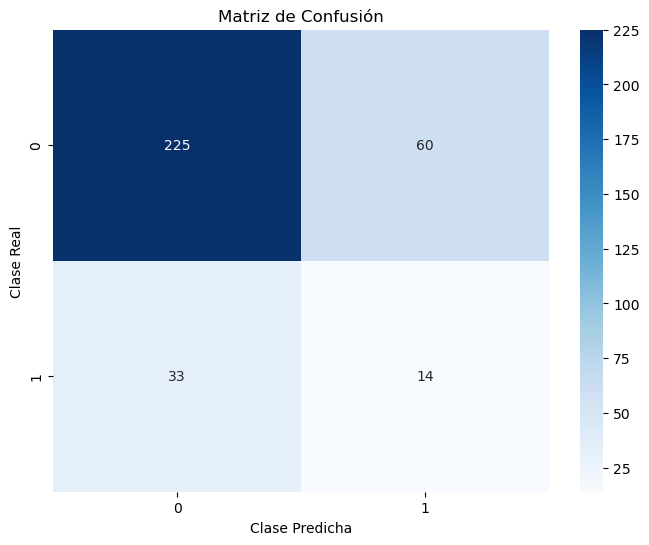

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       285
           1       0.19      0.30      0.23        47

    accuracy                           0.72       332
   macro avg       0.53      0.54      0.53       332
weighted avg       0.78      0.72      0.74       332



In [11]:
from sklearn.metrics import accuracy_score, f1_score

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score del modelo: {:.2f}".format(f1))


Precisión del modelo: 71.99%
F1-Score del modelo: 0.23


In [12]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [13]:
df_clean_train.groupby('victory_flag').size()

victory_flag
0    1400
1     258
dtype: int64

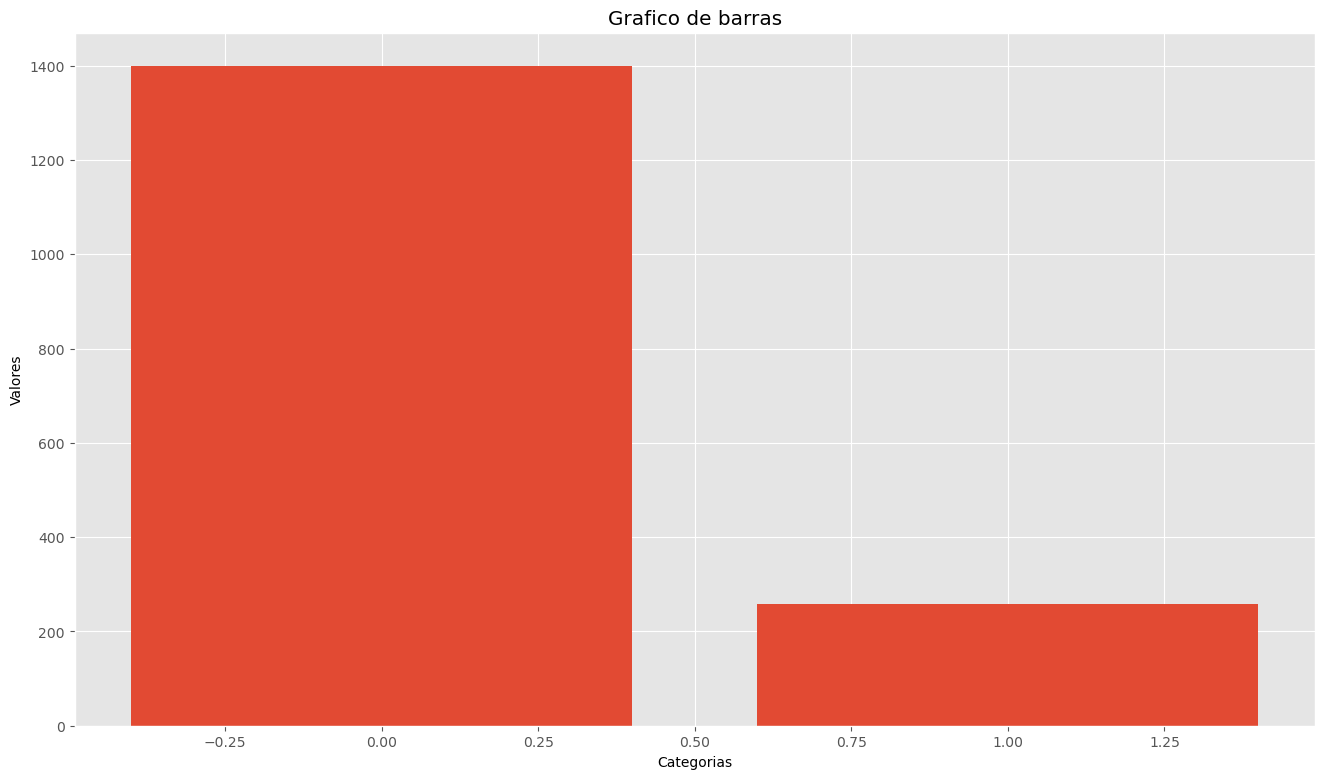

In [14]:
data = {'victory_flag': [1400, 258]}

df_victory_flag = pd.DataFrame(data)

plt.bar(df_victory_flag.index, df_victory_flag['victory_flag'])
plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.title('Grafico de barras')
plt.show()

La barra de la izquierda indica 0- Peticiones que no salieron adelante y a la derecha 1- Peticiones que salieron adelante. Lo que nos muestra que estan desbalanceadas.

Esto ocurre porque apenas hay peticiones que salgan adelante. En los datos que tenemos solo 254 salen adelante frente a las 1400 que no salen adelante.

### Arbol Decision Añadiendo el Numero de Firmas ['supporters]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_with_supporters, df_clean_train['victory_flag'], test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42, class_weight={1: 5.4})
dt_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = dt_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Árbol de Decisión:", accuracy)

Precisión del modelo de Árbol de Decisión: 0.7710843373493976


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       285
           1       0.25      0.30      0.27        47

    accuracy                           0.77       332
   macro avg       0.56      0.57      0.57       332
weighted avg       0.79      0.77      0.78       332



In [17]:
# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score del modelo: {:.2f}".format(f1))

Precisión del modelo: 77.11%
F1-Score del modelo: 0.27


Un F1-Score de 0.27 nos indica que aun hay mucho margen de mejora. Deberia tener al menos un 0.5 para ser un modelo predictivo aceptable, un valor de 0.7 o cercano a 1 seria lo optimo para realizar una prediccion acertada.

In [18]:
from sklearn.metrics import roc_auc_score

# Calcular las probabilidades de predicción para la clase positiva (clase 1)
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("AUC-ROC: {:.2f}%".format(auc_roc * 100))


AUC-ROC: 57.35%


Un valor de 57.35% para el AUC-ROC indica que el modelo tiene un rendimiento ligeramente mejor que una clasificación aleatoria, pero aún tiene margen de mejora. Idealmente, el AUC-ROC debería estar más cerca de 100% para indicar un mejor rendimiento en la separabilidad de las clases.

### Guardamos el modelo como .plk

In [20]:
import joblib

# Evaluar el rendimiento del modelo en el conjunto de prueba
score = dt_model.score(X_test, y_test)
print(f"Puntuación del modelo: {score}")

# Guardar el modelo entrenado en un archivo
joblib.dump(dt_model, 'modelo_entrenado.pkl')
print("Modelo guardado correctamente.")

# Cargar el modelo desde el archivo
modelo_guardado = joblib.load('modelo_entrenado.pkl')

Puntuación del modelo: 0.7710843373493976
Modelo guardado correctamente.


### Guardamos las predicciones en un archivo.json

In [19]:
import json

# Convertir y_pred a una lista de enteros
y_pred_list = [int(value) for value in y_pred]

# Crear un diccionario con la estructura deseada
data = {"target": y_pred_list}

# Guardar los datos en un archivo JSON
with open("predictions.json", "w") as json_file:
    json.dump(data, json_file)

# Convertir y_pred a una lista de enteros
y_pred_list = [int(value) for value in y_pred]

# Crear un diccionario con la estructura deseada
data = {"target": y_pred_list}

# Guardar los datos en un archivo JSON
with open("predictions.json", "w") as json_file:
    json.dump(data, json_file)

